<a href="https://colab.research.google.com/github/RFatih/Twitter_Twint_Analye-Visualize_Word_Frequencies/blob/main/Twtint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/twintproject/twint.git

Cloning into 'twint'...
remote: Enumerating objects: 4457, done.
remote: Total 4457 (delta 0), reused 0 (delta 0), pack-reused 4457
Receiving objects: 100% (4457/4457), 4.47 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (2636/2636), done.


In [2]:
%cd twint/
!ls

/content/twint
automate.py  elasticsearch  MANIFEST.in  requirements.txt  test.py
Dockerfile   LICENSE	    README.md	 setup.py	   twint


In [3]:
!pip3 install . -r requirements.txt

Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
     |████████████████████████████████| 263 kB 69.5 MB/s 
     |████████████████████████████████| 364 kB 47.0 MB/s 
     |████████████████████████████████| 142 kB 61.2 MB/s 
     |████████████████████████████████| 294 kB 58.5 MB/s 
     |████████████████████████████████| 291 kB 58.1 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=4642ebdc568104f48e1254822744e1c2a1d153b3c95d8bee7b7fe683176946f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-xncy82ln/wheels/f7/3e/11/2803f3c

In [4]:
!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to ./src/twint
  Running command git clone -q https://github.com/twintproject/twint.git /content/twint/src/twint
  Running command git checkout -q origin/master
  Running setup.py develop for twint


In [7]:
%cd /content/
!git clone https://github.com/RFatih/Twitter_Twint_Analye-Visualize_Word_Frequencies.git

/content
Cloning into 'Twitter_Twint_Analye-Visualize_Word_Frequencies'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [28]:
%cp /content/Twitter_Twint_Analye-Visualize_Word_Frequencies/stopw.csv /content/twint/ 
%cp /content/Twitter_Twint_Analye-Visualize_Word_Frequencies/deu.png /content/twint/ 

In [10]:
%cd /content/
!git clone https://github.com/amueller/word_cloud.git
%cd word_cloud
!pip install .

/content
Cloning into 'word_cloud'...
remote: Enumerating objects: 6459, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 6459 (delta 8), reused 15 (delta 7), pack-reused 6441
Receiving objects: 100% (6459/6459), 116.92 MiB | 32.45 MiB/s, done.
Resolving deltas: 100% (3839/3839), done.
/content/word_cloud
Processing /content/word_cloud
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for wordcloud: filename=wordcloud-1.8.1.post3+g0b3b942-cp37-cp37m-linux_x86_64.whl size=333114 sha256=40246dad6bb923efd85181d6877370335353f856c05e8953a03ddfe2ec2ab1ad
  Stored in direc

In [26]:
%cd /content/twint/
import twint
import nest_asyncio
nest_asyncio.apply()
config = twint.Config()
config.Username = "pusholder"
config.Limit = 1000
config.Year = "2020"
config.Store_csv = True
config.Output = "ph2020.csv"
twint.run.Search(config)


/content/twint
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [20]:
%cd /content/twint/
import twint
import nest_asyncio
nest_asyncio.apply()
config = twint.Config()
config.Username = "pusholder"
config.Limit = 3200
config.Year = "2021"
config.Store_csv = True
config.Output = "ph2021.csv"
twint.run.Search(config)

/content/twint
1344774987689971715 2020-12-31 22:38:36 +0000 <pusholder> Doğalgaza da %1 zam yapıldı.
1344772960599617536 2020-12-31 22:30:33 +0000 <pusholder> Dünya Sağlık Örgütü, Pfizer-BioNTech aşısının acil kullanımına onay verdi.
1344770143029755904 2020-12-31 22:19:21 +0000 <pusholder> 2021 itibariyle elektriğe %6 zam yapıldı.
1344766324971597824 2020-12-31 22:04:11 +0000 <pusholder> Exxen çöktü.  https://t.co/CpO26lsrsT
1344761499848470528 2020-12-31 21:45:00 +0000 <pusholder> 100 milyon liralık büyük ikramiye, Manisa'nın Akhisar ilçesinde satılan bir bilete çıktığı belirlendi.
1344759709350457344 2020-12-31 21:37:53 +0000 <pusholder> GSTV muhabiri Deniz Gülen: "Şu an ameliyata alındığına dair haber doğru değil. Çok şükür, bilinci yerinde ve hayati tehlikesi yok."
1344758532923658240 2020-12-31 21:33:13 +0000 <pusholder> Galatasaraylı futbolcu Omar Elabdellaoui'nin durumu ağır olduğu söyleniyor.
1344756832376651777 2020-12-31 21:26:27 +0000 <pusholder> Sağlık Bakanı Koca: "Umarı

/content/twint
                    id      conversation_id  ... trans_src trans_dest
0  1344774987689971715  1344774987689971715  ...       NaN        NaN
1  1344772960599617536  1344772960599617536  ...       NaN        NaN
2  1344770143029755904  1344770143029755904  ...       NaN        NaN
3  1344766324971597824  1344766324971597824  ...       NaN        NaN
4  1344761499848470528  1344761499848470528  ...       NaN        NaN

[5 rows x 36 columns]
id
conversation_id
created_at
date
time
timezone
user_id
username
name
place
tweet
language
mentions
urls
photos
replies_count
retweets_count
likes_count
hashtags
cashtags
link
retweet
quote_url
video
thumbnail
near
geo
source
user_rt_id
user_rt
retweet_id
reply_to
retweet_date
translate
trans_src
trans_dest
                                               tweet
0                       Doğalgaza da %1 zam yapıldı.
1  Dünya Sağlık Örgütü, Pfizer-BioNTech aşısının ...
2          2021 itibariyle elektriğe %6 zam yapıldı.
3              Exxen

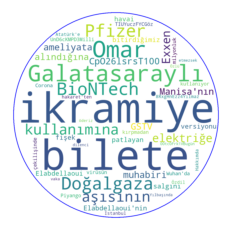

                    id      conversation_id  ... trans_src trans_dest
0  1344774987689971715  1344774987689971715  ...       NaN        NaN
1  1344772960599617536  1344772960599617536  ...       NaN        NaN
2  1344770143029755904  1344770143029755904  ...       NaN        NaN
3  1344766324971597824  1344766324971597824  ...       NaN        NaN
4  1344761499848470528  1344761499848470528  ...       NaN        NaN

[5 rows x 36 columns]
id
conversation_id
created_at
date
time
timezone
user_id
username
name
place
tweet
language
mentions
urls
photos
replies_count
retweets_count
likes_count
hashtags
cashtags
link
retweet
quote_url
video
thumbnail
near
geo
source
user_rt_id
user_rt
retweet_id
reply_to
retweet_date
translate
trans_src
trans_dest
                                               tweet
0                       Doğalgaza da %1 zam yapıldı.
1  Dünya Sağlık Örgütü, Pfizer-BioNTech aşısının ...
2          2021 itibariyle elektriğe %6 zam yapıldı.
3              Exxen çöktü.  https:

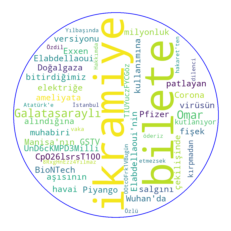

In [29]:
%cd /content/twint/
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

def create_wc(tweets):
  df = pd.read_csv("/content/twint/"+tweets+".csv", error_bad_lines=False)# enter the csv file name that twint just created
  sw =pd.read_csv("/content/twint/stopw.csv", error_bad_lines=False)# enter the additional stop words csv. I added the turkish one.
  print(df.head())
  for col in df.columns:
    print(col)
  df.drop(df.columns.difference(['tweet']), 1, inplace=True)
  print(df.head())

  text = ""

  for a in df.tweet:
    text+=a
  #text = text.lower()
  stopwords = set(STOPWORDS)
  stopwords.update(["of", "in","the","https","co","bir","bu","da","daha","ve","ile","de","en","var","yok","ne","gibi","mi","ya"])
  for data in sw.bir:
    stopwords.update([data])

  #print(stopwords)
  deu_mask = np.array(Image.open("/content/twint/deu.png")) # add the mask for showing the words I used the logo of my school
  transformed_deu_mask = np.ndarray((deu_mask.shape[0],deu_mask.shape[1]), np.int32)

  for i in range(len(deu_mask)):
      transformed_deu_mask[i] = list(map(transform_format, deu_mask[i]))



  tuples = [tuple(x) for x in df.values]

  wordcloud = WordCloud(stopwords=stopwords,mask=transformed_deu_mask, max_words=1000, background_color="white",contour_width=3, contour_color='blue').generate(text)

  wordcloud.to_file("/content/twint/"+tweets+".png")#save the output

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
create_wc("ph2021")
create_wc("ph2021")

In [30]:
%cd /content/twint/
%ls


/content/twint
automate.py     README.md
deu.png         requirements.txt
Dockerfile      setup.py
elasticsearch/  src/
LICENSE         stopw.csv
MANIFEST.in     test.py
ph2021.csv      twint/
ph2021.png      Twitter_Twint_Analye-Visualize_Word_Frequencies/
